**Trabalho de Deep Learning**



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
link = "https://raw.githubusercontent.com/rmicheldev/datasets/main/MoviesOnStreamingPlatforms_updated.csv"

# Carrega o arquivo do github
rawDf = pd.read_csv(link)

In [5]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [6]:
#Mostra os tipos de dados
rawDf.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

* Unnamed: 0           int64   Numerical
* ID                   int64   Numerical 
* Title               object   ????
* Year                 int64   Numerical 
* Age                 object   Categorical
* IMDb               float64   Numerical
* Rotten Tomatoes     object   Numerical
* Netflix              int64   Categorical
* Hulu                 int64   Categorical
* Prime Video          int64   Categorical
* Disney+              int64   Categorical
* Type                 int64   Categorical
* Directors           object   Categorical
* Genres              object   Categorical 
* Country             object   Categorical
* Language            object   Categorical 
* Runtime            float64   Numerical

In [7]:
# Remove a primeira coluna (indice 0) que não possui valor e a coluna Type e a nota no Rotten Tomatoes 
explDf = rawDf.drop(rawDf.columns[[0]], axis=1).drop(['Type','Rotten Tomatoes'], axis=1)
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [8]:
# Dropa todas as linhas que tem colunas faltando informação 
explDf = explDf.dropna()
display(explDf)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [9]:
#renomeando colunas
colsRen = {'ID':'id',
        'Title':'title',
        'Year':'year',
        'Age':'age',
        'IMDb':'imdb',        
        'Netflix':'netflix',
        'Hulu':'hulu',
        'Prime Video':'prime',
        'Disney+':'disney',        
        'Directors':'directors',
        'Genres':'genres',
        'Country':'country',
        'Language':'language',
        'Runtime':'runtime'
        }


explDf = explDf.rename(columns = colsRen, inplace = False)
explDf.dtypes

id             int64
title         object
year           int64
age           object
imdb         float64
netflix        int64
hulu           int64
prime          int64
disney         int64
directors     object
genres        object
country       object
language      object
runtime      float64
dtype: object

In [10]:
#Verificando quais valores que IMDb pode assumir
notasImdb = np.sort(explDf['imdb'].unique())
display(notasImdb)

array([1. , 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1])

In [13]:
# Criando a coluna "recommended" 1 para recomendado e 0 para não baseado na nota do imdb > 6
explDf = explDf.assign(recommended=0)
explDf.loc[explDf['imdb'] > 6, 'recommended'] = 1
explDf.head(10)

,id,title,year,age,imdb,netflix,hulu,prime,disney,directors,genres,country,language,runtime,recommended
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,1
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,1
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,1
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,1
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,1
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,1


In [14]:
#retira a nota do imdb
explDf = explDf.drop(['imdb'], axis=1)
explDf.head(10)

,id,title,year,age,netflix,hulu,prime,disney,directors,genres,country,language,runtime,recommended
0,1,Inception,2010,13+,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,1
5,6,Spider-Man: Into the Spider-Verse,2018,7+,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,1
6,7,The Pianist,2002,18+,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,1
7,8,Django Unchained,2012,18+,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,1
8,9,Raiders of the Lost Ark,1981,7+,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,1
9,10,Inglourious Basterds,2009,18+,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,1


In [37]:
# Verificando filmes não recomendados
display(explDf[explDf['recommended'] == 0])

,id,title,year,age,netflix,hulu,prime,disney,directors,genres,country,language,runtime,recommended
426,427,Cam,2018,18+,1,0,0,0,Daniel Goldhaber,"Horror,Mystery,Thriller",United States,English,94.0,0
463,464,2012,2009,13+,1,0,0,0,Roland Emmerich,"Action,Adventure,Sci-Fi",United States,"English,French,Tibetan,Mandarin,Russian,Hindi,...",158.0,0
504,505,Haywire,2011,18+,1,0,0,0,Steven Soderbergh,"Action,Drama,Thriller","Ireland,United States","English,Spanish",93.0,0
506,507,Stuart Little,1999,7+,1,0,0,0,Rob Minkoff,"Adventure,Comedy,Family,Fantasy","Germany,United States","English,Dutch",84.0,0
510,511,Furie,2019,18+,1,0,0,0,David Ayer,"Action,Drama,War","United States,China,United Kingdom","English,German",134.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,16725,Can of Worms,1999,7+,0,0,0,1,Paul Schneider,"Comedy,Family,Sci-Fi","United States,Canada",English,90.0,0
16726,16727,Richie Rich's Christmas Wish,1998,all,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0,0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0,0
16738,16739,Whispers: An Elephant's Tale,2000,all,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0,0


In [15]:
#Dividindo os dados para treino e teste (validação)
testeDf = explDf.sample(frac=0.2, random_state=42)
treinoDf = explDf.drop(testeDf.index)

print("%d amostras para treino e %d para teste" % (len(treinoDf),len(testeDf)))

5637 amostras para treino e 1409 para teste


In [16]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("recommended")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [17]:
treinoDs = dataframe_to_dataset(treinoDf)
testeDs = dataframe_to_dataset(testeDf)

In [18]:
for x, y in treinoDs.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=7978>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Diary of a Madman'>, 'year': <tf.Tensor: shape=(), dtype=int64, numpy=1963>, 'age': <tf.Tensor: shape=(), dtype=string, numpy=b'7+'>, 'netflix': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hulu': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'prime': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'disney': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'directors': <tf.Tensor: shape=(), dtype=string, numpy=b'Reginald Le Borg'>, 'genres': <tf.Tensor: shape=(), dtype=string, numpy=b'Horror'>, 'country': <tf.Tensor: shape=(), dtype=string, numpy=b'United States'>, 'language': <tf.Tensor: shape=(), dtype=string, numpy=b'English'>, 'runtime': <tf.Tensor: shape=(), dtype=float64, numpy=96.0>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [19]:
treinoDs = treinoDs.batch(32)
testeDs = testeDs.batch(32)

In [20]:
# código retirado de https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature


In [21]:
shp = (1,)

year =  keras.Input(shape=shp,name="year", dtype="int64") 
netflix =  keras.Input(shape=shp,name="netflix", dtype="int64")
hulu =  keras.Input(shape=shp,name="hulu", dtype="int64") 
prime =  keras.Input(shape=shp,name="prime", dtype="int64")
disney =  keras.Input(shape=shp,name="disney", dtype="int64")

runtime = keras.Input(shape=shp,name="runtime")

age = keras.Input(shape=shp,name="age", dtype="string")
directors = keras.Input(shape=shp,name="directors", dtype="string")
genres = keras.Input(shape=shp,name="genres", dtype="string")
country = keras.Input(shape=shp,name="country", dtype="string")
language = keras.Input(shape=shp,name="language", dtype="string")

In [22]:
all_inputs = [
year,
netflix,
hulu,
prime,
disney,
runtime,
age,
directors,
genres,
country,
language
]

In [23]:
year_encoded = encode_integer_categorical_feature(year, "year", treinoDs)
netflix_encoded = encode_integer_categorical_feature(netflix, "netflix", treinoDs)
hulu_encoded = encode_integer_categorical_feature(hulu, "hulu", treinoDs)
prime_encoded = encode_integer_categorical_feature(prime, "prime", treinoDs)
disney_encoded = encode_integer_categorical_feature(disney, "disney", treinoDs)

runtime_encoded = encode_numerical_feature(runtime, "runtime", treinoDs)

age_encoded = encode_string_categorical_feature(age, "age", treinoDs)
directors_encoded = encode_string_categorical_feature(directors, "directors", treinoDs)
genres_encoded = encode_string_categorical_feature(genres, "genres", treinoDs)
country_encoded = encode_string_categorical_feature(country, "country", treinoDs)
language_encoded = encode_string_categorical_feature(language, "language", treinoDs)

In [24]:
all_features = layers.concatenate(
    [
     year_encoded,
     netflix_encoded,
     hulu_encoded,
     prime_encoded,
     disney_encoded,

     runtime_encoded,

     age_encoded,
     directors_encoded,
     genres_encoded,
     country_encoded,
     language_encoded   
    ]
)

In [25]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


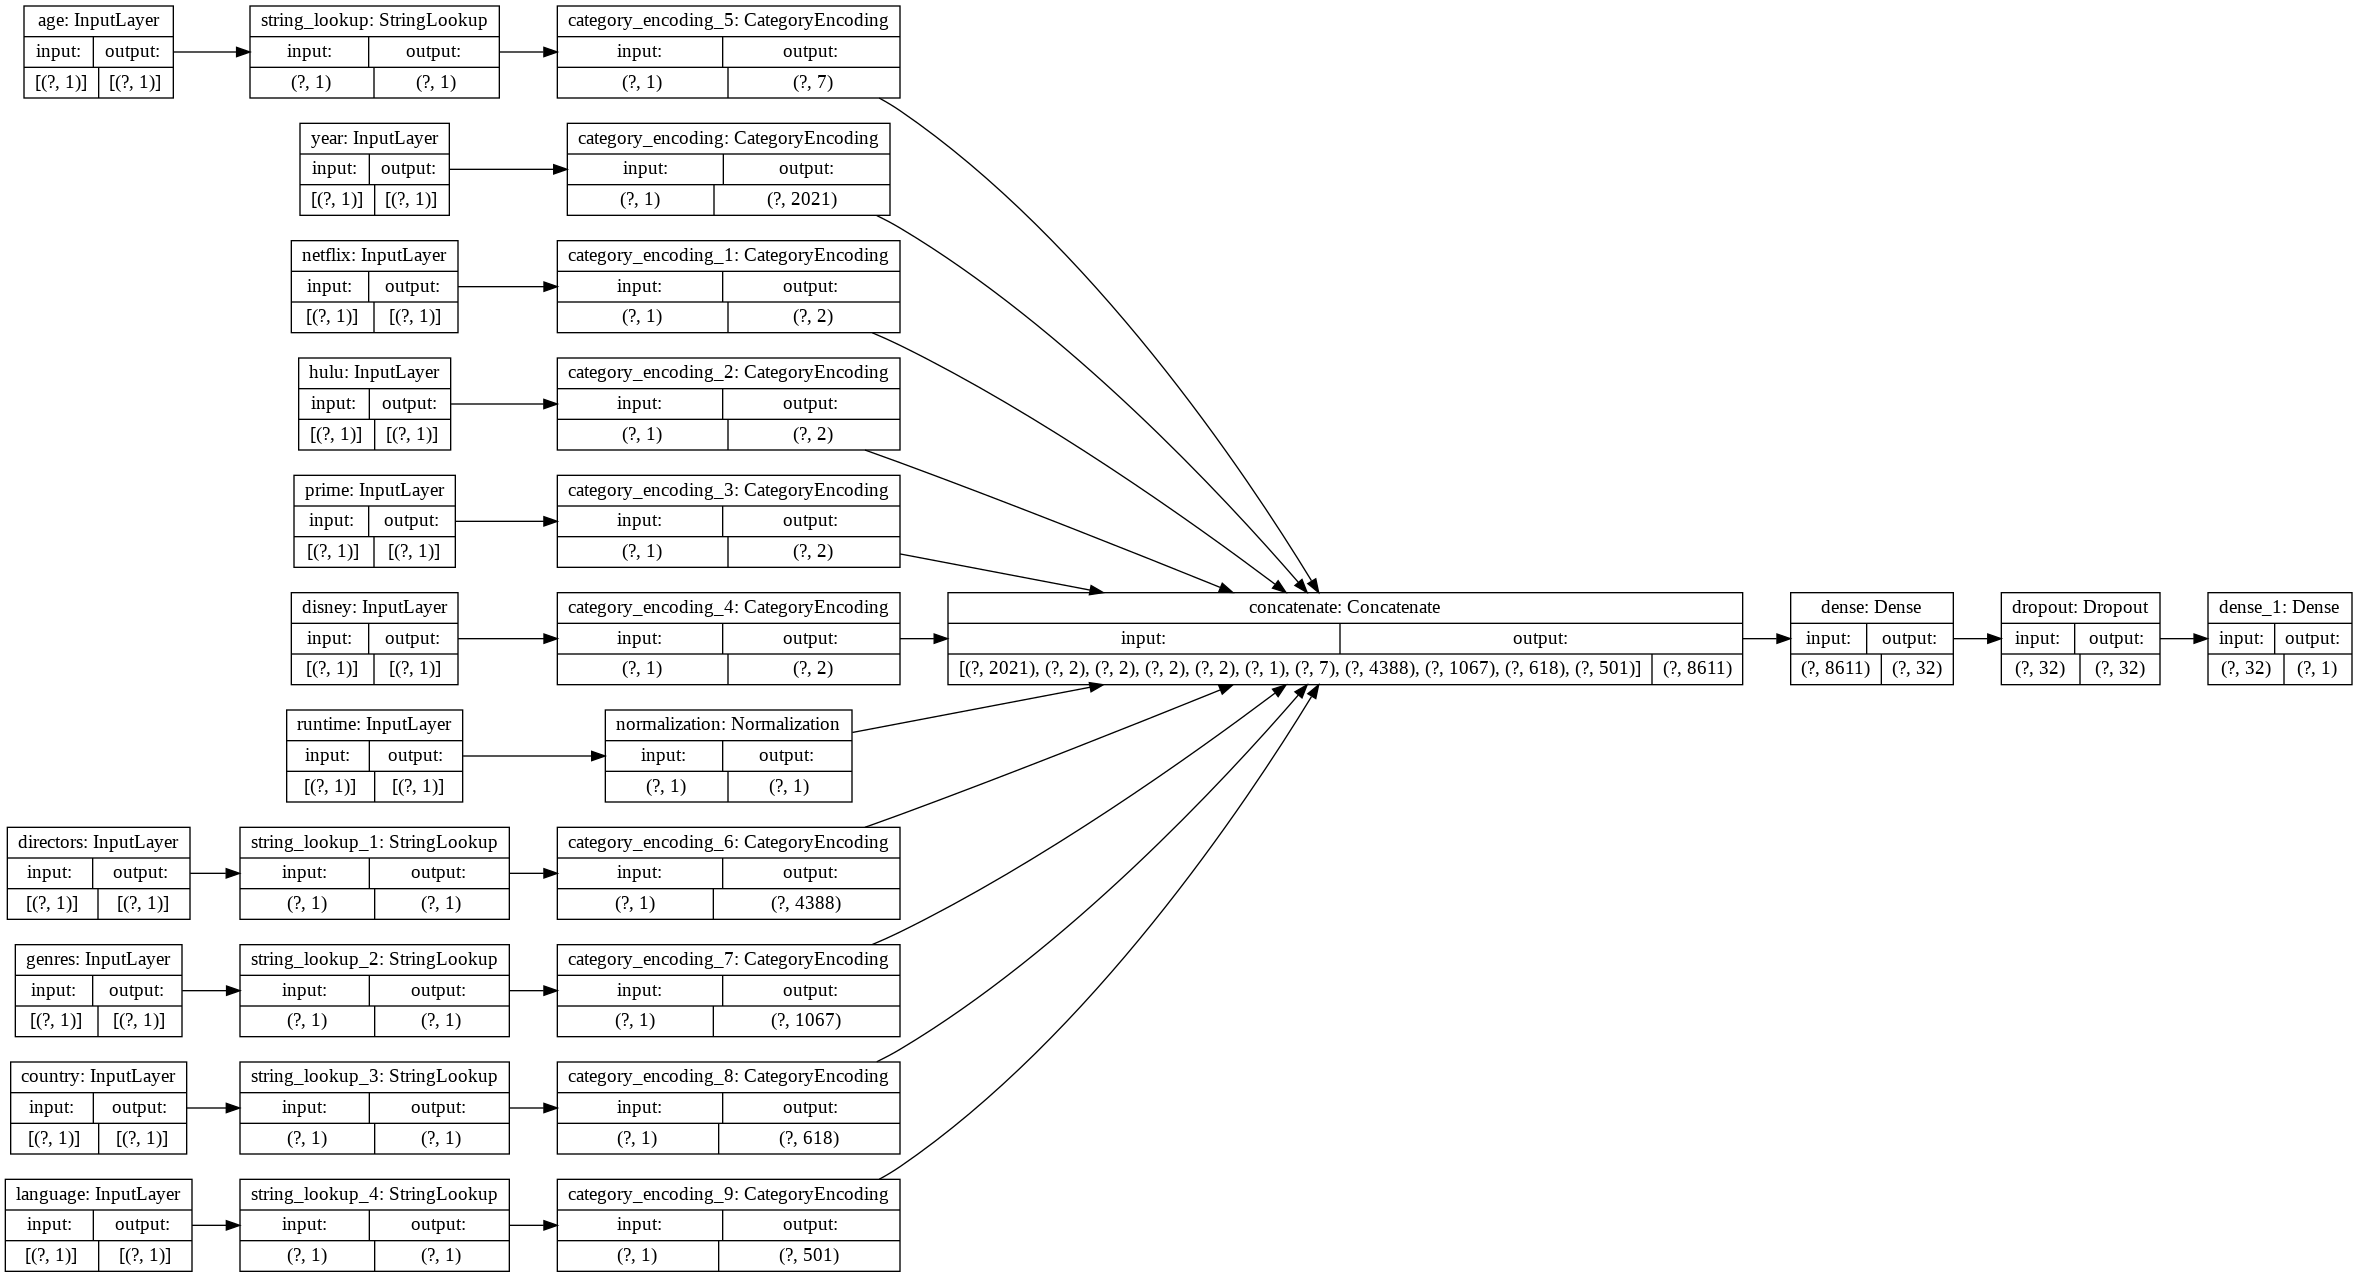

In [26]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [27]:
model.fit(treinoDs, epochs=50, validation_data=testeDs)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id', 'title'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


177/177 [==============================] - 1s 6ms/step - loss: 0.6435 - accuracy: 0.6376 - val_loss: 0.6260 - val_accuracy: 0.6487
Epoch 2/50
177/177 [==============================] - 1s 5ms/step - loss: 0.5773 - accuracy: 0.7128 - val_loss: 0.6034 - val_accuracy: 0.6749
Epoch 3/50
177/177 [==============================] - 1s 5ms/step - loss: 0.5093 - accuracy: 0.7660 - val_loss: 0.5835 - val_accuracy: 0.6849
Epoch 4/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4491 - accuracy: 0.8063 - val_loss: 0.5773 - val_accuracy: 0.6856
Epoch 5/50
177/177 [==============================] - 1s 5ms/step - loss: 0.3887 - accuracy: 0.8499 - val_loss: 0.5768 - val_accuracy: 0.6920
Epoch 6/50
177/177 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8719 - val_loss: 0.5865 - val_accuracy: 0.6863
Epoch 7/50
177/177 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.9042 - val_loss: 0.5955 - val_accuracy: 0.6920
Epoch 8/50
177/17

In [78]:
# Testando com o filme Inception
sampleRec = {
    "year": 2010,
    "age": "13+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "Christopher Nolan",
    "genres": "Action,Adventure,Sci-Fi,Thriller",
    "country": "United States,United Kingdom",
    "language": "English,Japanese,French",
    "runtime": 148.0
}


#Testando com o filme Furie 
sampleNotRec = {
    "year": 2019,
    "age": "18+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "David Ayer",
    "genres": "Action,Drama,War",
    "country": "United States,China,United Kingdom",
    "language": "English,German",
    "runtime": 134.0
}

In [61]:
input_dictRec = {name: tf.convert_to_tensor([value]) for name, value in sampleRec.items()}
predictionsRec = model.predict(input_dictRec)

In [62]:
print(
    "Este filme tem %.1f porcento de probabilidade "
    "de ser recomendado como um bom filme." % (100 * predictionsRec[0][0],)
)

Este filme tem 100.0 porcento de probabilidade de ser recomendado como um bom filme.


In [79]:
input_dictNotRec = {name: tf.convert_to_tensor([value]) for name, value in sampleNotRec.items()}
predictionsNotRec = model.predict(input_dictNotRec)

In [80]:
print(
    "Este filme tem %.1f porcento de probabilidade "
    "de ser recomendado como um bom filme." % (100 * predictionsNotRec[0][0],)
)

Este filme tem 1.1 porcento de probabilidade de ser recomendado como um bom filme.
